<a href="https://colab.research.google.com/github/vahidseydi/Regression/blob/master/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Course (fall-2019) STB University -- session 1 --  simple regression model 
[Thanks to Professor Emily Fox for a wonderful teaching of machine learning](https://www.coursera.org/learn/ml-regression)
# Simple Regression Model in General:
# &emsp; $ y_i = w_0+w_1x + \epsilon_i$
# we discuss about:
### &emsp; - approach 0 : brute force search
### &emsp; - approach 1 : close form
### &emsp; - approach 2 : hill climbing (gradient steepest descent) 
### &emsp; - maximum likelihood
## Dataset: House price prediction

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import warnings
warnings.simplefilter("ignore")

In [3]:
data_set_path='https://raw.githubusercontent.com/vahidseydi/Regression/master/kc_house_data.csv'
data=pd.read_csv(data_set_path)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# input and target

In [4]:
x=np.array(data['sqft_living'])
y=np.array(data['price'])
N=len(y)
print('Number of data is: %d'%N)

Number of data is: 21613


## Let's randomly assign weights 

In [5]:
#---------------------------------------------
# w0 is sampled from normal dist
#---------------------------------------------
sigma=10
mu=0
w0=sigma*np.random.randn()+mu
#---------------------------------------------
# w1 is sampled from uniform dist
#---------------------------------------------
upper=100
lower=0
w1=(upper-lower)*np.random.random() + lower;
#---------------------------------------------
# print w0, w1
#---------------------------------------------
w0_random=w0
w1_random=w1
print('w0 = %f , w1 = %f'%(w0,w1))

w0 = 4.401857 , w1 = 57.564951


### predicting price using these weights

In [0]:
y_hat=np.empty(shape=(N,))
for i in range(N):
  y_hat[i]=w0+w1*x[i]

### results in DataFrame

In [7]:
pd.DataFrame({'sqft_living': x, 'price': y,'predicted_price':y_hat}).head(10)

,sqft_living,price,predicted_price
0,1180,221900.0,67931.044238
1,2570,538000.0,147946.326364
2,770,180000.0,44329.414258
3,1960,604000.0,112831.706151
4,1680,510000.0,96713.519823
5,5420,1225000.0,312006.437199
6,1715,257500.0,98728.293114
7,1060,291850.0,61023.250097
8,1780,229500.0,102470.014940
9,1890,323000.0,108802.159569


### results in graph


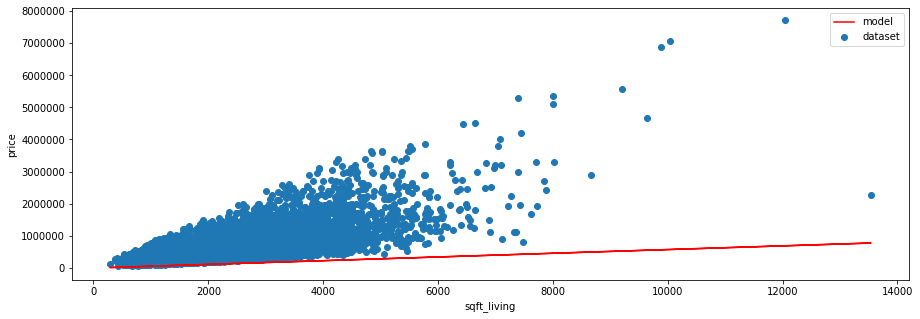

In [8]:
fig = plt.figure(figsize=(15,5))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(x,y)
plt.plot(x,y_hat,'r')
plt.legend([y_hat,y],labels=['model','dataset'])
plt.show()

### Residual Sum of Squre(RSS)

In [9]:
RSS_random=0
for i in range(N):
  Residual=y[i]-y_hat[i]
  RSS_random+=np.power(Residual,2)
print('RSS = %f'%RSS_random)

RSS = 6203305326077135.000000


#brute force search

In [0]:
#---------------------------------------------
# define a function to predict 
#---------------------------------------------
def predict(x,w0,w1):
  for i in range(len(x)):
    y_hat[i]=w0+w1*x[i]
  return y_hat


In [0]:
#---------------------------------------------
# define a function to calculate RSS 
#---------------------------------------------
def RSS(y,y_hat):
  rss=0
  for i in range(len(y)):
    rss+=np.power(y[i]-y_hat[i],2)
  return rss

In [12]:
#---------------------------------------------
# brute force search
#---------------------------------------------
RSS_brute=np.inf
for w0 in range(-100,100,10):
  for w1 in range(0,1000,50):
    y_hat=predict(x,w0,w1)
    rss=RSS(y,y_hat)
    if rss < RSS_brute:
      RSS_brute=rss
      w0_brute=w0
      w1_brute=w1
print('RSS = %f'%RSS_brute)
print('w0 = %f , w1 = %f'%(w0_brute,w1_brute))

RSS = 1503038206484430.000000
w0 = 90.000000 , w1 = 250.000000


<BarContainer object of 2 artists>

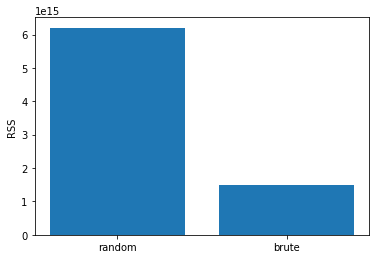

In [13]:
plt.ylabel('RSS')
plt.bar(['random','brute'],[RSS_random,RSS_brute])

# Approach 1: close form

# Approach 2: Gradient Descent

# Maximum Likelihood

# Outliers Influence

In [14]:
data['sqft_living'].describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8, .9])

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
10%       1090.000000
20%       1320.000000
30%       1520.000000
40%       1710.000000
50%       1910.000000
60%       2130.000000
70%       2400.000000
80%       2730.000000
90%       3250.000000
max      13540.000000
Name: sqft_living, dtype: float64

## Q1: What can we realize by describe method?